# Age-by-State Matrix Population Model


ประชากรของสัตว์ชนิดหนึ่งที่มีการเปลี่ยนแปลง จากสัตว์แรกเกิด ซึ่งมีอายุไม่ถึง 1 ปี เป็นสัตว์วัยเยาว์ ซึ่งมีอายุตั้งแต่ 1 ปี แต่ไม่ถึง  2 ปี และเป็นสัตว์ตัวเต็มวัย ซึ่งมีอายุตั้งแต่ 2 ปีขึ้นไป 

กำหนดสัญลักษณ์ตามจำนวนประชากรของแต่ละกลุ่มของ ณ จุดเวลา $ n $ ดังต่อไปนี้


- กำหนดให้ $ N_n $ แทนด้วย จำนวนสัตว์แรกเกิด ณ ปีที่ $n$
- กำหนดให้ $ Y_n $ แทนด้วย จำนวนสัตว์วัยเยาว์ ณ ปีที่ $n$
- กำหนดให้ $ A_n $ แทนด้วย จำนวนสัตว์ตัวเต็มวัย ณ ปีที่ $n$


ถ้าในแต่ละปีสัตว์ชนิดนี้มีการเปลี่ยนแปลงของจำนวนประชากรในแต่ละกลุ่มช่วงอายุเป็นดังนี้

- จำนวนกลุ่มสัตว์แรกเกิด เพิ่มขึ้น 30\% ของจำนวนสัตว์ตัวเต็มวัยในปีก่อนหน้า
- จำนวนกลุ่มสัตว์แรกเกิดมีอัตราการมีชีวิตรอดไปเป็นสัตว์วัยเยาว์เท่ากับ 90\%     
- จำนวนกลุ่มสัตว์วัยเยาว์มีอัตราการมีชีวิตรอดไปเป็นสัตว์ตัวเต็มวัยเท่ากับ 80\%
- จำนวนกลุ่มสัตว์ตัวเต็มวัยมีอัตราการตายเท่ากับ 50\%


เราสามารถเขียนแบบจำลองคณิตศาสตร์ดีสครีตโดยใช้ระบบสมการผลต่างอธิบายถึงการเปลี่ยนแปลงจำนวนของสัตว์ในแต่ละกลุ่มช่วงอายุ เป็นดังนี้
\begin{align*}
N_{n+1} &= 0.3A_n \\
Y_{n+1} &= 0.9N_n \\
A_{n+1} &= 0.8Y_n + 0.5A_n  
\end{align*}
หรือ

$$ 
\begin{bmatrix} N_{n+1}\\Y_{n+1}\\A_{n+1} \end{bmatrix} = 
\begin{bmatrix} 0 & 0 & 0.3\\0.9 & 0 & 0\\0 & 0.8 & 0.5 \end{bmatrix}
\begin{bmatrix} N_n\\Y_n\\A_n \end{bmatrix}
$$


ถ้ากำหนดให้เวคเตอร์ $$x_n =\begin{bmatrix} N_n\\Y_n\\A_n \end{bmatrix}$$ และเมทริกซ์ $$M = \begin{bmatrix} 0 & 0 & 0.3\\0.9 & 0 & 0\\0 & 0.8 & 0.5 \end{bmatrix}$$ จะได้ว่า 

$$ x_{n+1} = Mx_{n} $$
และได้สูตรบีเนต์คือ $$ x_{n} = M^nx_{0} $$


## 1
ถ้าในปี ค.ศ. 2022 เราพบว่าจำนวนของสัตว์ชนิดนี้แยกตามช่วงอายุมีจำนวนดังต่อไปนี้

- จำนวนสัตว์แรกเกิดคือ 10,655 ตัว 
- จำนวนสัตว์วัยเยาว์ คือ 5,458 ตัว และ 
- จำนวนสัตว์ตัวเต็มวัย 25,556 ตัว 

จงหาจำนวนของสัตว์ชนิดนี้แยกตามช่วงอายุในปี ค.ศ. 2031

In [175]:
import numpy as np
import matplotlib.pyplot as plt

x_0 = np.array([10656, 5458, 25556])
M = np.array([ [0,0,0.3], [0.9,0,0], [0,0.8,0.5] ])

In [185]:
years = 10
n = np.arange(0, years)
x = np.zeros((years,3), dtype=np.float64)
print(x)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [177]:
for r in range(0, years):
    x[r] = np.linalg.matrix_power(M, r) @ x_0
print(x)

[[10656.          5458.         25556.        ]
 [ 7666.8         9590.4        17144.4       ]
 [ 5143.32        6900.12       16244.52      ]
 [ 4873.356       4628.988      13642.356     ]
 [ 4092.7068      4386.0204     10524.3684    ]
 [ 3157.31052     3683.43612     8771.00052   ]
 [ 2631.300156    2841.579468    7332.249156  ]
 [ 2199.6747468   2368.1701404   5939.3881524 ]
 [ 1781.81644572  1979.70727212  4864.23018852]
 [ 1459.26905656  1603.63480115  4015.88091196]]


In [178]:
N = x[:, 0]
print(f'Numbers of newborn animals are \n {N}')

Numbers of newborn animals are 
 [10656.          7666.8         5143.32        4873.356
  4092.7068      3157.31052     2631.300156    2199.6747468
  1781.81644572  1459.26905656]


In [179]:
Y = x[:, 1]
print(f'Numbers of young animals are \n {Y}')

Numbers of young animals are 
 [5458.         9590.4        6900.12       4628.988      4386.0204
 3683.43612    2841.579468   2368.1701404  1979.70727212 1603.63480115]


In [180]:
A = x[:, 2]
print(f'Numbers of adult animals are \n {A}')

Numbers of adult animals are 
 [25556.         17144.4        16244.52       13642.356
 10524.3684      8771.00052     7332.249156    5939.3881524
  4864.23018852  4015.88091196]


Text(0, 0.5, 'Number of Pupulation')

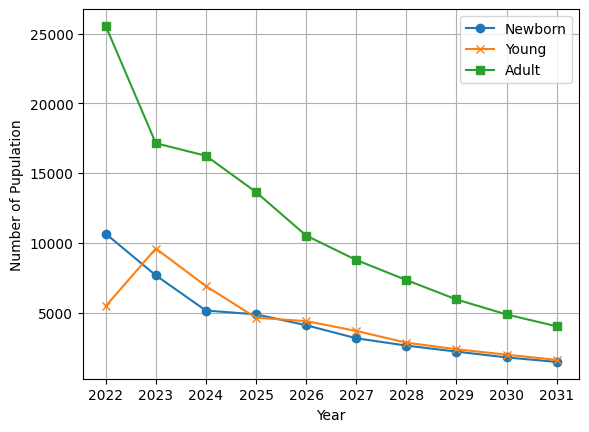

In [181]:
plt.plot(n, N, label='Newborn', marker='o');
plt.plot(n, Y, label='Young', marker='x');
plt.plot(n, A, label='Adult', marker='s');
plt.legend();

plt.grid()
plt.xticks(n, n+2022);
plt.xlabel('Year')
plt.ylabel('Number of Pupulation')

In [182]:
print(f'The number of newborn animals on year 2031 is {N[years - 1]:.2f}')
print(f'The number of young animals on year 2031 is {Y[years - 1]:.2f}')
print(f'The number of adult animals on year 2031 is {A[years - 1]:.2f}')

The number of newborn animals on year 2031 is 1459.27
The number of young animals on year 2031 is 1603.63
The number of adult animals on year 2031 is 4015.88


--------------

## 2

จงคาดการณ์ว่าในอนาคตสัตว์ชนิดนี้จะสูญพันธุ์หรือไม่ ถ้าใช่จงหาว่าสัตว์ชนืดนี้จะสูญพันธ์ในปีใด

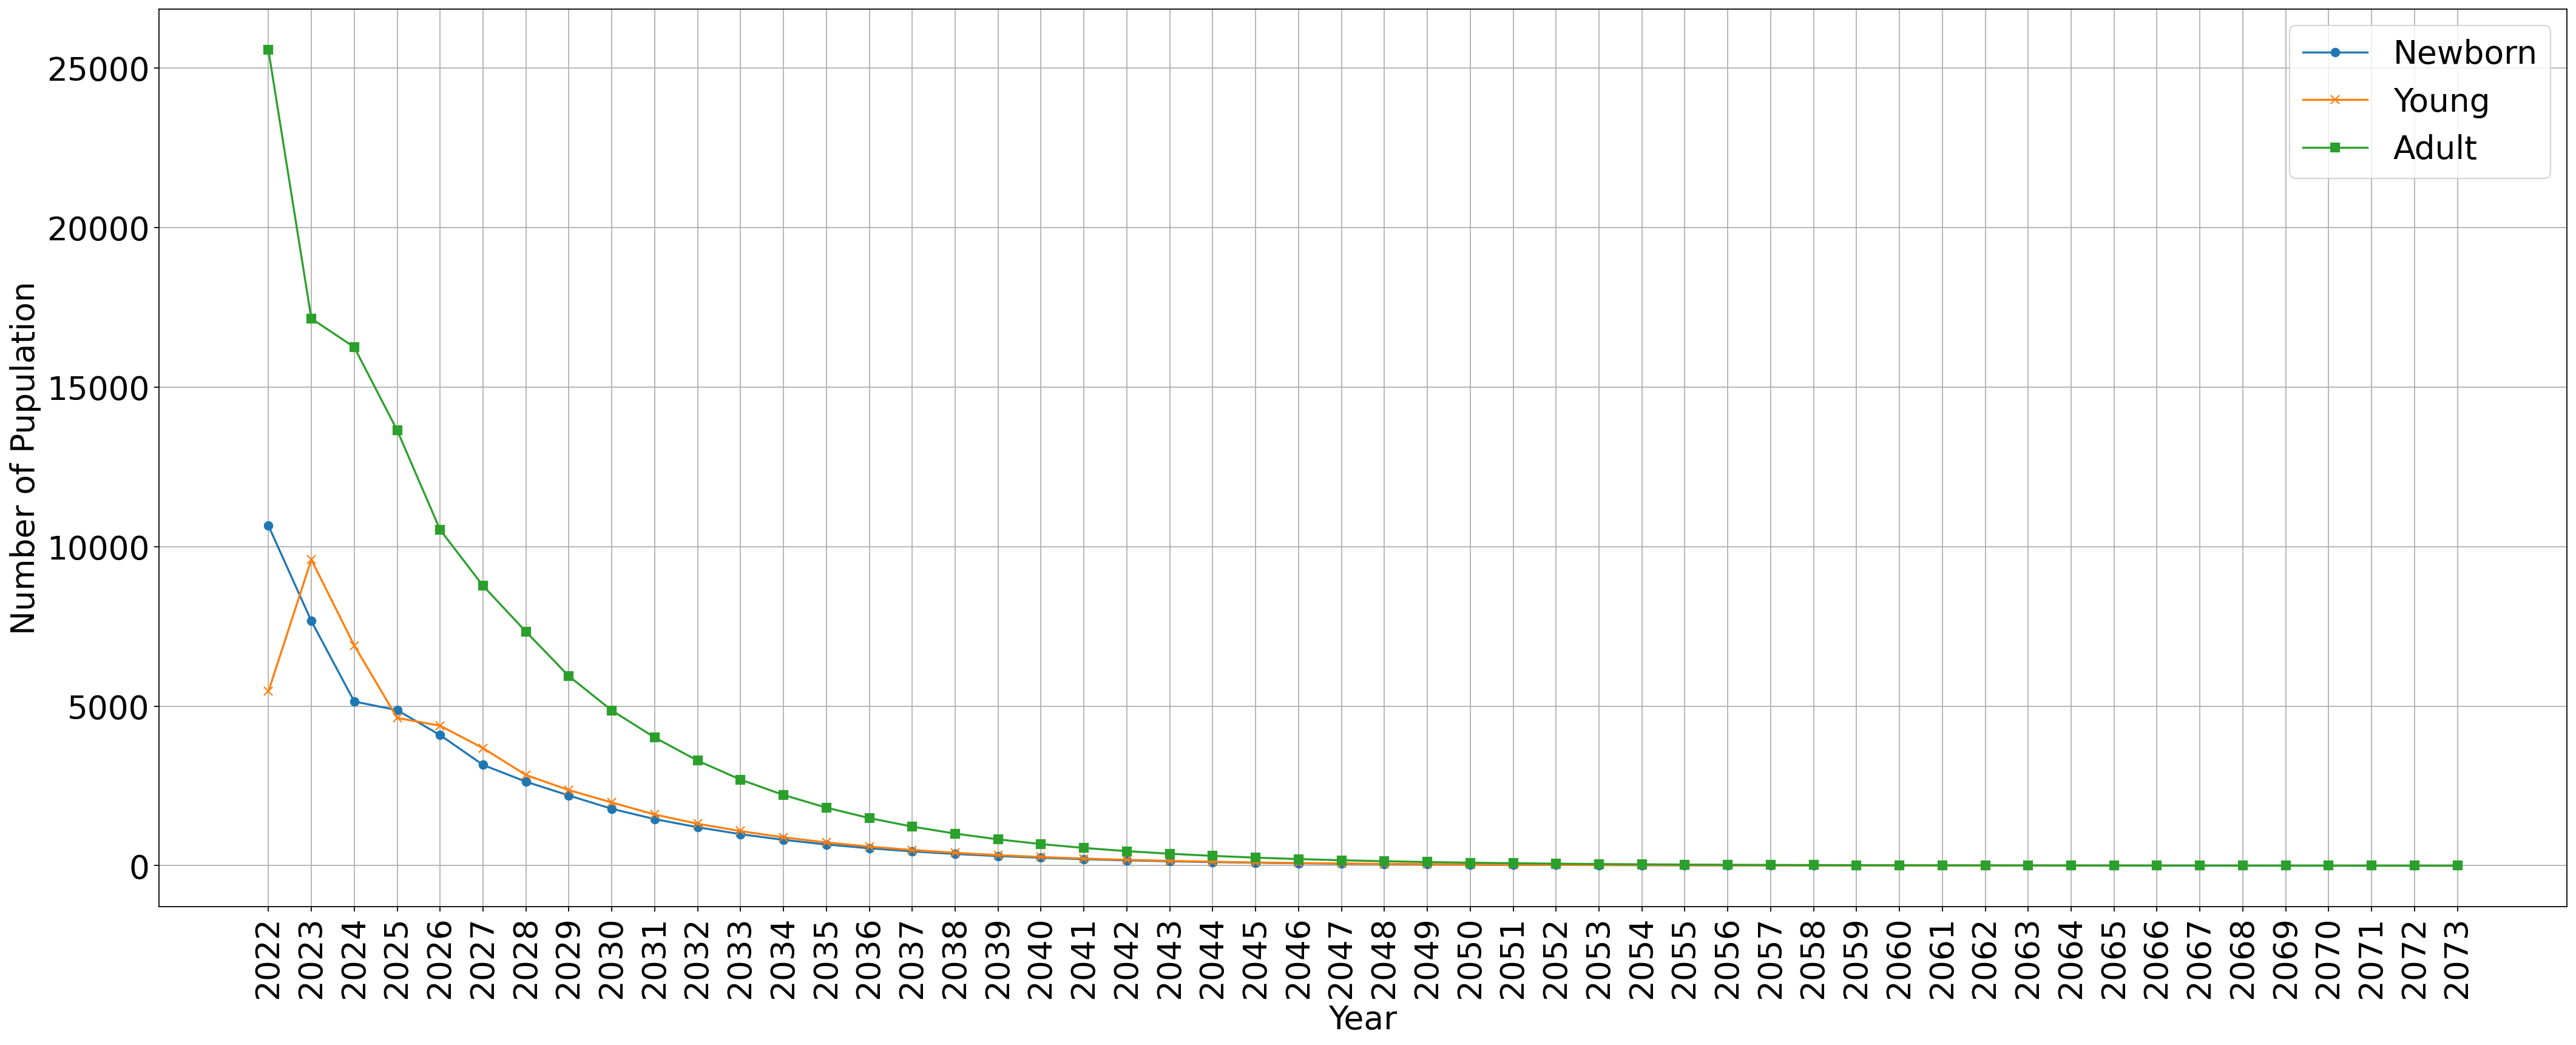

In [242]:
years = 52

x_0 = np.array([10656, 5458, 25556])
M = np.array([ [0,0,0.3], [0.9,0,0], [0,0.8,0.5] ])

n = np.arange(0, years)
x = np.zeros((years,3), dtype=np.float64)

for r in range(0, years):
    x[r] = np.linalg.matrix_power(M, r) @ x_0
    
N = x[:, 0]
Y = x[:, 1]
A = x[:, 2]

plt.figure(figsize=(32,12), dpi=160)
plt.plot(n, N, label='Newborn', marker='o');
plt.plot(n, Y, label='Young', marker='x');
plt.plot(n, A, label='Adult', marker='s');
plt.legend();
plt.grid()
plt.xticks(n, n+2022, rotation=90);
plt.xlabel('Year')
plt.ylabel('Number of Pupulation')
plt.rcParams.update({'font.size': 18})
# plt.yscale('log')

In [232]:
sol = np.concatenate((n.reshape(years,1), n.reshape(years,1)+2022, x), axis=1)
with np.printoptions(precision=3, suppress=True):
    print(sol)

[[    0.     2022.    10656.     5458.    25556.   ]
 [    1.     2023.     7666.8    9590.4   17144.4  ]
 [    2.     2024.     5143.32   6900.12  16244.52 ]
 [    3.     2025.     4873.356  4628.988 13642.356]
 [    4.     2026.     4092.707  4386.02  10524.368]
 [    5.     2027.     3157.311  3683.436  8771.001]
 [    6.     2028.     2631.3    2841.579  7332.249]
 [    7.     2029.     2199.675  2368.17   5939.388]
 [    8.     2030.     1781.816  1979.707  4864.23 ]
 [    9.     2031.     1459.269  1603.635  4015.881]
 [   10.     2032.     1204.764  1313.342  3290.848]
 [   11.     2033.      987.254  1084.288  2696.098]
 [   12.     2034.      808.829   888.529  2215.479]
 [   13.     2035.      664.644   727.946  1818.563]
 [   14.     2036.      545.569   598.179  1491.639]
 [   15.     2037.      447.492   491.012  1224.363]
 [   16.     2038.      367.309   402.742  1004.991]
 [   17.     2039.      301.497   330.578   824.689]
 [   18.     2040.      247.407   271.348   67

--------------------